In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Projet Science des données

### 1 Descriptif du projet

L’objectif est de vous placer dans le contexte d’un projet de science des
données de type classification supervisée. Il s’agit de vous faire pratiquer les
principales étapes de ce type de projet en s’appuyant sur des données réelles
comme celles que l’on peut trouver dans différents entrepôts en accès libre.

Vous allez travailler sur un jeu de données disponible sur MyLearningSpace,
un fichier présentant les différentes variables est également disponible. Pour des
raisons didactiques, nous avons légèrement modifié ce jeu de données mais la
plupart des valeurs sont d’origine.

Il est important de préciser que le travail que vous allez accomplir au cours
de ce projet n’est pas spécifiquement lié au jeu de données sélectionné. On
retrouve systématiquement la plupart des étapes de ce travail dans un projet de
classification de données. Il est donc conseillé de bien comprendre l’objectif de
chaque étape et la façon d’atteindre cet objectif. Cela vous servira certainement
dans le cadre d’autres projets de même nature.

### 2 Travail à réaliser

Le travail à réaliser se décompose en plusieurs étapes qui sont
caractéristiques d’un projet de science des données (comme indiqué
dans le cours). Il y a généralement des étapes consacrées à la compréhension des
données, à la préparation des données, à l’entrâınement et la comparaison de
différents modèles puis à la sauvegarde du meilleur modèle obtenu pour l’inclure
dans le système en production.

Les étapes sont décrites dans les sections suivantes. Il est conseillé de suivre
l’ordre indiqué. Pour chaque étape, des explications et des indications de fonctions à utiliser dans différentes bibliothèques sont données. Votre travail consiste
à comprendre les explications, à explorer la documentation des fonctions mentionnées et à produire le code pour réaliser l’objectif de l’étape. A chaque étape,
pensez à vérifier que votre code produit bien le résultat attendu. Pour écrire
ce code, il est parfois nécessaire de s’appuyer sur le code écrit lors d’étapes
précédentes. C’est à vous d’évaluer le code qui doit être réutilisé.

En fin de projet, il faudra fournir vos codes commentés ainsi qu’un
rapport clair et concis rédigé à la manière d’un compte-rendu d’étude.
En particulier, vous vous attacherez à analyser les résultats obtenus
et à répondre aux différentes questions posées à chaque étape.

### 3 Importation des données

Le jeu de données est disponible sur le site du cours sous la forme d’un
fichier CSV (Comma separated values). En utilisant la bibliothèque Pandas et sa
fonction read csv(), vous devez importer le fichier en mémoire pour permettre
la manipulation des données.

Afin de réaliser cet import, prenez le temps d’analyser le fichier de façon à
identifier les paramètres à fournir à la fonction read csv(). Si tout s’est bien
passé lors de l’importation, la fonction read csv() renvoie un objet de la classe
DataFrame.

Assurez-vous que l’importation est correcte en utilisant les fonctionnalités
offertes pour les objets DataFrame (voir le cours à cet effet), notamment l’affichage des informations sur les variables et leur type, ainsi que l’affichage des
premières lignes.


In [5]:
insurances = pd.read_csv('./data/car_insurance.csv')

In [6]:
insurances.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [7]:
insurances.dtypes

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object


Il est important d’identifier les données d’entrée et la variable
de sortie correspondant à l’étiquette de classes. Après identification,
précisez clairement l’objectif du problème de classification à traiter.

```
Le besoin ici est de prédire, en fonction des caracteristiques d'un futur contrat d'assurance donné, si le client fera un demande d'indémnisation dans le cadre du contrat. C'est un entre guillemets un indicateur de rentabilité pour l'assureur.

Les caractéristiques du contrat sont les colonnes du tableau (excepté id et outcome). On parle içi d'apprentissage supervisé car les données en sortie sont déjà etiquettées, on cherche simplement à retrouver des résultats/prédictions similaires à partir de nouveaux contrats dont on ne connait pas l'issue.
```

### 4 Examen des données

Après avoir importé les données, il est important de comprendre leur structure. Plus votre compréhension des données sera fine, plus vous serez en mesure
de les transformer pour obtenir des modèles précis. Les éléments à connâıtre sur
vos données sont généralement :
- la taille du jeu de données
- le type des données (numérique : int, float ou qualitatif/catégoriel : object)
- la qualité des données (est-ce qu’il y a des données manquantes ou aberrantes ?)
- la distribution des données
- ...

En utilisant les méthodes de la classe DataFrame, procédez à l’examen des
données et notez les informations qui vous paraissent pertinentes. En particulier,
il est important d’identifier les données qualitatives, les données manquantes
(représentées par le symbole ’NA’ : Not Available) et les données aberrantes qui
devront toutes être pré-traitées avant la classification (pré-traitements à réaliser
dans la section 5).

En utilisant la méthode isna() de la classe DataFrame, vous pouvez détecter
s’il existe des données manquantes.

Une façon d’examiner les données à traiter est de construire une visualisation
de type histogramme pour chaque variable numérique. Pour rappel, un histogramme montre le nombre d’observations qui appartiennent à chaque plage de
valeurs donnée. Etudiez la méthode hist() de la classe DataFrame et utilisez-la
pour obtenir les histogrammes des variables numériques.

Quelles observations pouvez-vous faire à partir de ces diagrammes ? Vous
pouvez éventuellement identifier les données aberrantes, c’est-à-dire en dehors
de l’échelle de valeurs prises habituellement par une variable.

In [8]:
len(insurances)

10000

In [9]:
insurances.dtypes.groupby(insurances.dtypes).apply(lambda x:  x.index.tolist()).to_dict()

{dtype('int64'): ['id',
  'age',
  'gender',
  'postal_code',
  'speeding_violations',
  'duis',
  'past_accidents'],
 dtype('float64'): ['credit_score',
  'vehicle_ownership',
  'married',
  'children',
  'annual_mileage',
  'outcome'],
 dtype('O'): ['driving_experience',
  'education',
  'income',
  'vehicle_year',
  'vehicle_type']}

In [ ]:
insurances.isna().sum().to_frame().transpose()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,0,0,0,0,0,0,982,0,0,0,0,0,957,0,0,0,0,0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'vehicle_ownership'}>,
        <Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'postal_code'}>],
       [<Axes: title={'center': 'annual_mileage'}>,
        <Axes: title={'center': 'speeding_violations'}>,
        <Axes: title={'center': 'duis'}>,
        <Axes: title={'center': 'past_accidents'}>],
       [<Axes: title={'center': 'outcome'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

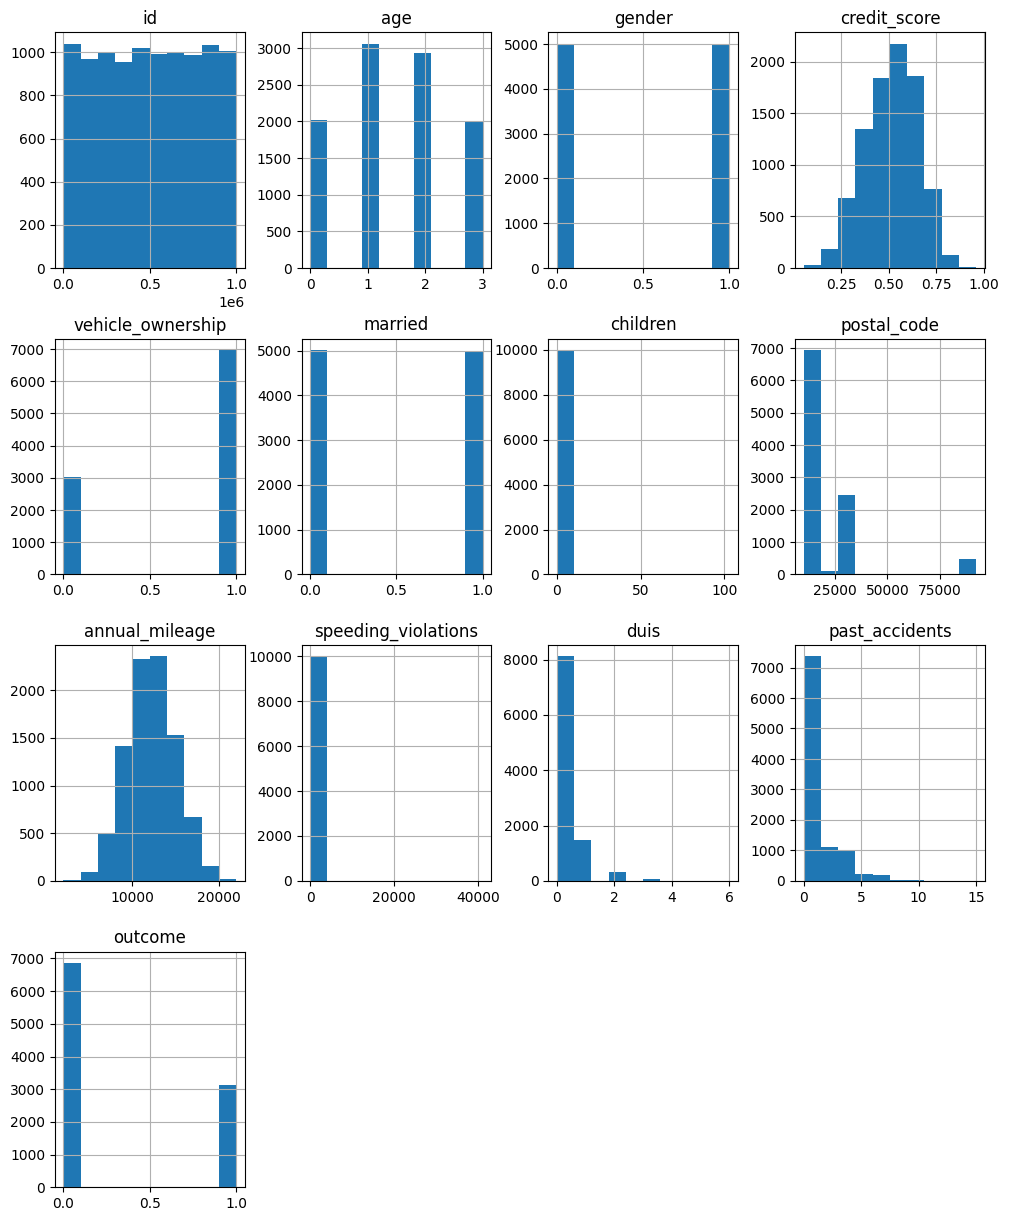

In [ ]:
insurances.hist(figsize=(12, 15))

<Axes: xlabel='children'>

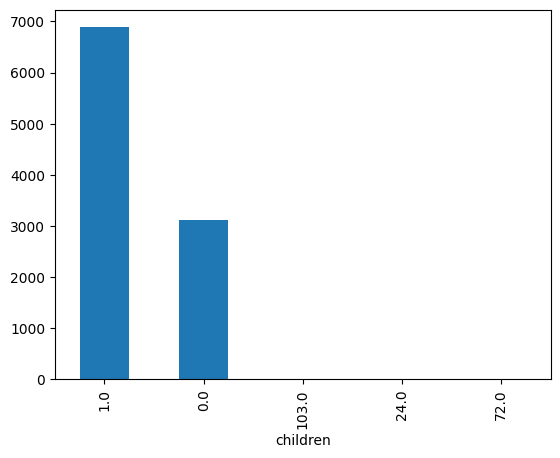

In [ ]:
insurances.children.value_counts().plot.bar()
# max coherant = 1

<Axes: xlabel='speeding_violations'>

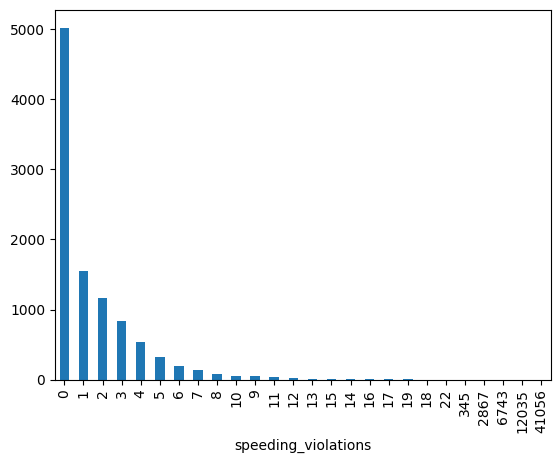

In [ ]:
insurances.speeding_violations.value_counts().plot.bar()
# max coherent = 22

<Axes: ylabel='Frequency'>

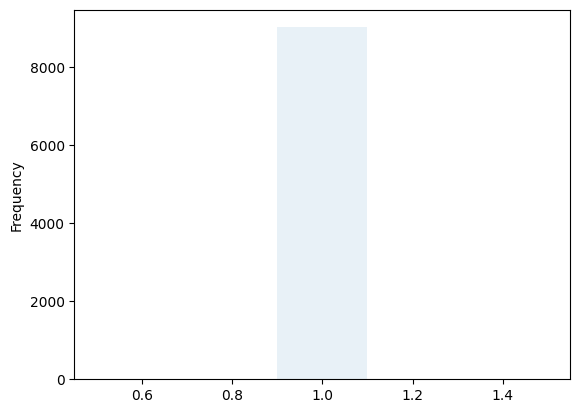

In [50]:
insurances.credit_score.value_counts().plot.hist(bins=5, alpha=0.1)
# max coherent = 22
# plt.scatter(x=insurances.credit_score, y=insurances.credit_score.value_counts())

### 5 Préparation des données

Pour faire fonctionner correctement les algorithmes de classification, il est nécessaire d’avoir des données de type numérique et de qualité, c’est-à-dire des données qui ne contiennent pas de valeurs manquantes ni de valeurs aberrantes.

Données manquantes : En analysant les données, vous avez dû noter si une variable possède des valeurs manquantes (’NA’). En utilisant la méthode isna() de la classe DataFrame et la fonction sum(), vous pouvez obtenir le nombre de valeurs manquantes pour chacune des variables. Pour résoudre le problème des valeurs manquantes, plusieurs solutions sont possibles :
- se débarrasser des échantillons correspondants
- supprimer la variable en question
- attribuer une valeur conforme à la distribution de la variable (moyenne, médiane, valeur la plus probable...)



En général, si le nombre de valeurs manquantes est très important (plus d’un tiers des données environ), on choisit la 2ème solution. La méthode drop() de la classe DataFrame permet de supprimer une ou plusieurs colonnes facilement. Vous profiterez de cette étape pour supprimer en même temps les colonnes contenant des variables qui ne vous paraissent pas utiles pour résoudre le problème de classification.

Sinon la dernière solution est celle à privilégier. Pour les variables numériques, il suffit de calculer la médiane ou la moyenne de la variable puis de remplacer les valeurs manquantes par le résultat du calcul. Pour les variables qualitatives, de type texte le plus souvent, vous pouvez choisir de remplacer les valeurs NA par le texte le plus fréquent. Dans les deux cas, pour effectuer le remplacement, vous pouvez utiliser la méthode fillna() de la classe DataFrame (voir la documentation pour les paramètres).




In [ ]:
cleaned = insurances.drop(['id'], axis=1)

cleaned = 